### Student Information
Name:鄭鈺潔

Student ID:106061708

GitHub ID:Jessie-Cheng

---

# Part I.  Lab1 Take home exercise
### Read in the dataset for lab1

In [17]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)
import pandas as pd
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Exercise 2 (Take home)
Experiment with other querying techniques using pandas dataframes. 
###### a). Swap two columns  
While swap column values by index, using `pd.values` instead of `X['category_name', 'category']`. Also, it is not allowed to shift only partial of the column, such as first 10 rows of value by indexing.

In [18]:
## Exercise 2 a.
## excute the code below to swap category_name and category 
X[['category','category_name']][0:10]

,category,category_name
0,1,comp.graphics
1,1,comp.graphics
2,3,soc.religion.christian
3,3,soc.religion.christian
4,3,soc.religion.christian
5,3,soc.religion.christian
6,3,soc.religion.christian
7,2,sci.med
8,2,sci.med
9,2,sci.med


In [19]:
X.loc[:,['category_name','category']] = X[['category','category_name']].values
X[['category','category_name']][0:10]

,category,category_name
0,comp.graphics,1
1,comp.graphics,1
2,soc.religion.christian,3
3,soc.religion.christian,3
4,soc.religion.christian,3
5,soc.religion.christian,3
6,soc.religion.christian,3
7,sci.med,2
8,sci.med,2
9,sci.med,2


In [20]:
## For swap back
X.loc[:,['category_name','category']] = X[['category','category_name']].values
X[['category','category_name']][0:10]

,category,category_name
0,1,comp.graphics
1,1,comp.graphics
2,3,soc.religion.christian
3,3,soc.religion.christian
4,3,soc.religion.christian
5,3,soc.religion.christian
6,3,soc.religion.christian
7,2,sci.med
8,2,sci.med
9,2,sci.med


###### b) Sorting
If we want to sort with categories then we can use `sort_values()` to look deep into one or few categories.

In [21]:
## Exercise 2 Part b.
X.sort_values(by = ['category_name'])[0:10]

,text,category,category_name
745,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
1504,Subject: Re: Death Penalty (was Re: Political ...,0,alt.atheism
1621,From: nancyo@shnext15.ucslabs.sfu.ca (Nancy Pa...,0,alt.atheism
365,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,0,alt.atheism
1798,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
615,From: livesey@solntze.wpd.sgi.com (Jon Livesey...,0,alt.atheism
1622,From: bil@okcforum.osrhe.edu (Bill Conner) Sub...,0,alt.atheism
1032,From: mathew <mathew@mantis.co.uk> Subject: Re...,0,alt.atheism
617,From: 9051467f@levels.unisa.edu.au (The Desert...,0,alt.atheism
1996,Organization: Penn State University From: Andr...,0,alt.atheism


### Exercise 5 (Take home)
Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [22]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [23]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

#### Exercise 5 Answer  
While identify the 6 example, all of them seems to be meaningless for human. However, the `.isnull()` returns some of them to be false, which means that the computer cannot detect it.  
The reason is because ID C and D and F which has some string inside the missing example column. Though `NAN`,`None`, and `''` stands for missing value. But as the computer, that block is not null.

### Exercise 6 (Take home)
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`.

In [24]:
X_sample = X.sample(n=100)


X distribution    0.213    0.259    0.263    0.265
Sample distribution 0.22    0.27    0.28    0.23


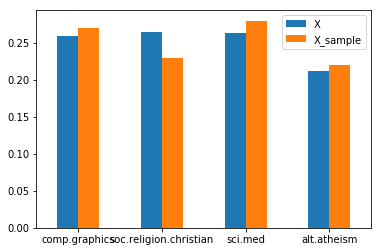

In [25]:
print()
print("X distribution    %.3f"%(len(X[X['category']==0])/len(X))
,"   %.3f"%(len(X[X['category']==1])/len(X))
,"   %.3f"%(len(X[X['category']==2])/len(X))
,"   %.3f"%(len(X[X['category']==3])/len(X)))

print("Sample distribution",len(X_sample[X_sample['category']==0])/len(X_sample)
,"  ",len(X_sample[X_sample['category']==1])/len(X_sample)
,"  ",len(X_sample[X_sample['category']==2])/len(X_sample)
,"  ",len(X_sample[X_sample['category']==3])/len(X_sample))
import matplotlib.pyplot as plt
%matplotlib inline

index = X.category_name.unique()

X_num = np.zeros([4])
X_sample_num = np.zeros([4])
for i in range(4):
    X_num[i] = X.category_name.value_counts()[index[i]]
    X_sample_num[i] = X_sample.category_name.value_counts()[index[i]]
X_num = X_num/len(X)
X_sample_num = X_sample_num/len(X_sample)
df_plot = pd.DataFrame({'X': X_num,
                    'X_sample': X_sample_num}, index=index)
ax = df_plot.plot.bar(rot=0)

In [26]:
X_sample[0:10]

,text,category,category_name
967,From: rcomg@melomys.co.rmit.oz.AU (Mark Gregor...,1,comp.graphics
850,From: phs431d@vaxc.cc.monash.edu.au Subject: R...,3,soc.religion.christian
1710,From: muirm@argon.gas.organpipe.uug.arizona.ed...,3,soc.religion.christian
1316,From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...,3,soc.religion.christian
652,From: jaeger@buphy.bu.edu (Gregg Jaeger) Subje...,0,alt.atheism
1050,From: sbrun@oregon.uoregon.edu (Sarah Anne Bru...,2,sci.med
40,From: david-s@hsr.no (David A. Sjoen) Subject:...,3,soc.religion.christian
770,From: harvey@oasys.dt.navy.mil (Betty Harvey) ...,2,sci.med
2057,From: dingebre@imp.sim.es.com (David Ingebrets...,1,comp.graphics
1607,From: doyle+@pitt.edu (Howard R Doyle) Subject...,2,sci.med


#### Exercise 6 Answer
After sample process, the distribution of category might differs, especially when sample size is much less than original dataset. For X_sample index have been shuffled.

### Exercise 8 (Take home)
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise.

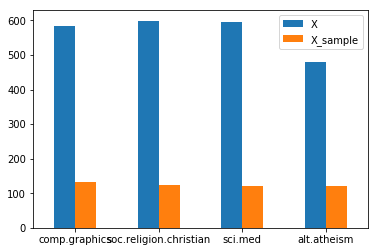

In [27]:
X_sample = X.sample(n=500)
index = X.category_name.unique()

X_num = np.zeros([4])
X_sample_num = np.zeros([4])
for i in range(4):
    X_num[i] = X.category_name.value_counts()[index[i]]
    X_sample_num[i] = X_sample.category_name.value_counts()[index[i]]

df_plot = pd.DataFrame({'X': X_num,
                    'X_sample': X_sample_num}, index=index)
ax = df_plot.plot.bar(rot=0)

### Exercise 10(Take home)
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

term_index = np.where(X_counts[4,:].toarray()==1)[1]
count_vect.get_feature_names()[term_index[1]]

'01'

#### Exercise 10 Answer
First, use `np.where()` function to find the index of which record equals 1. Then, use build-in function `get_feature_names()` to get the feature name of that index found before.
That is our output shows `01` is the term in fifth record.

### Exercise 11 ( Take home)
As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization.

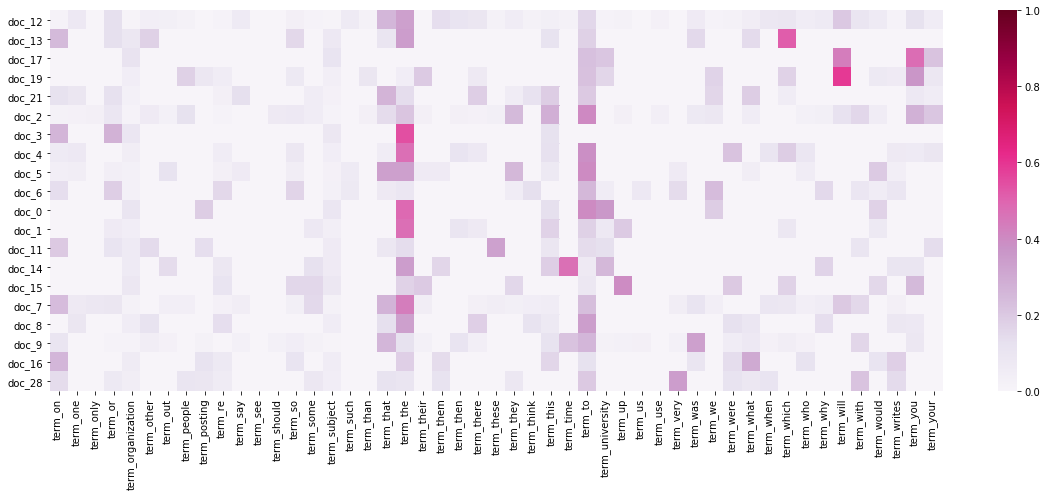

In [29]:
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=100)
feature = vectorizer.fit_transform(X.text)

plot_x = []
for i in range(100):
    plot_x.append("term_"+str(vectorizer.get_feature_names()[i]))

##choose 5 document from each category for visulization
plot_y = []
for i in categories:
    index = X[X['category_name']==i][0:5].index
    for k in index:
        plot_y.append("doc_"+ str(k)) 

plot_z = np.zeros([len(plot_y),100])
for i in range(len(plot_y)):
    for j in range(100):
        n_doc = int(plot_y[i][4:])
        plot_z[i,j] = feature.toarray()[n_doc, j]

df_todraw = pd.DataFrame(plot_z[:,51::], columns = plot_x[51::], index = plot_y)
plt.subplots(figsize=(20, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=False)

#### Exercise 11 Answer
For selecting feature, use TFIDF rather than wordcount. The `TfidfVectorizer()` can be set with the parameter `max_features` to choose the top 100 rank as representation. For documents, sample from different categories.

### Exercise 12 (Take home)
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

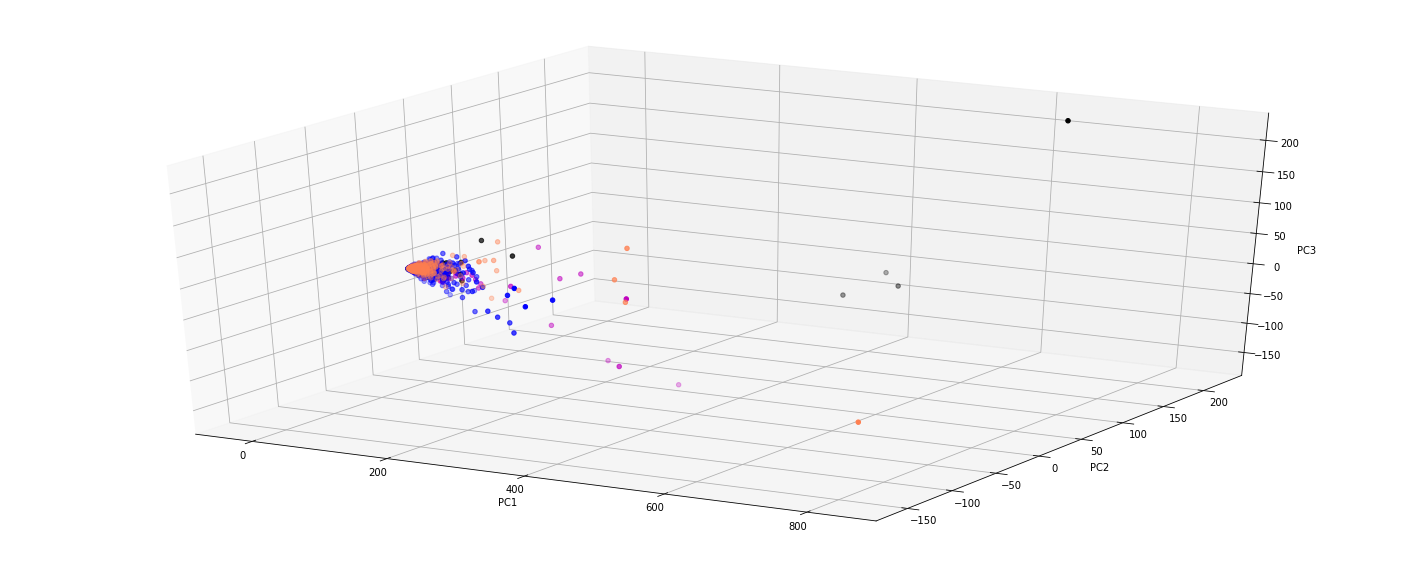

In [30]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
col = ['coral', 'blue', 'black', 'm']
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs , c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nPC1')
ax.set_ylabel('\nPC2')
ax.set_zlabel('\nPC3')

plt.show()

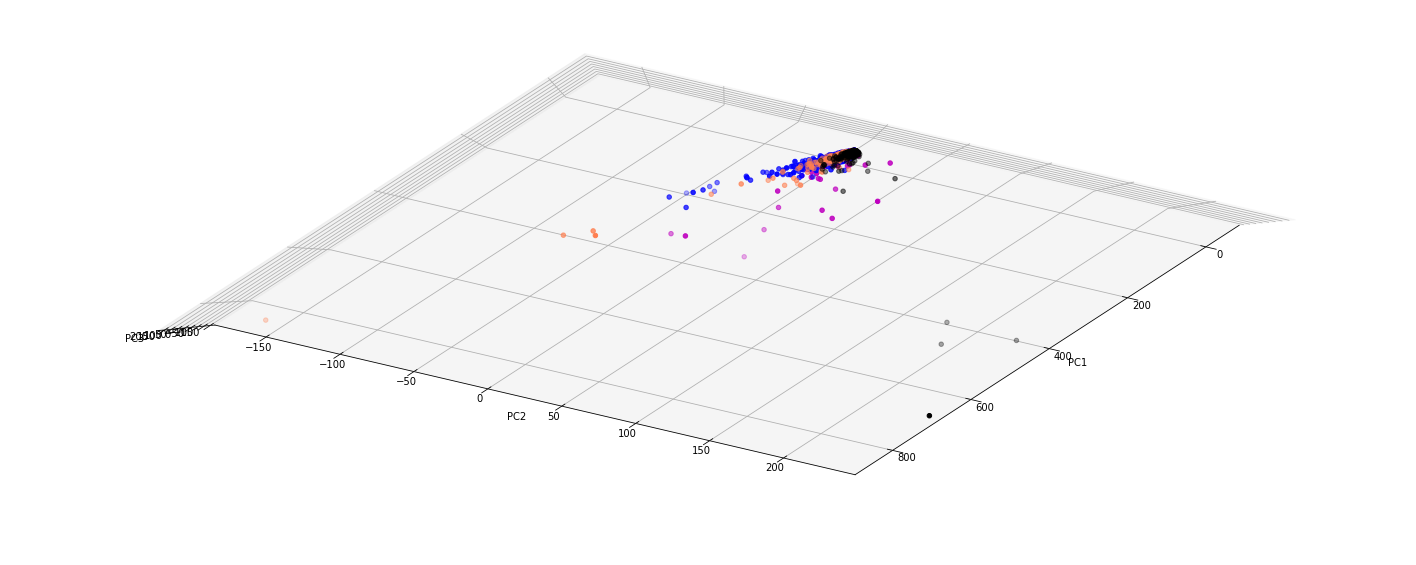

In [105]:
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(111, projection='3d')
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs , c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nPC1')
ax.set_ylabel('\nPC2')
ax.set_zlabel('\nPC3')
ax.view_init(90,30)
plt.show()

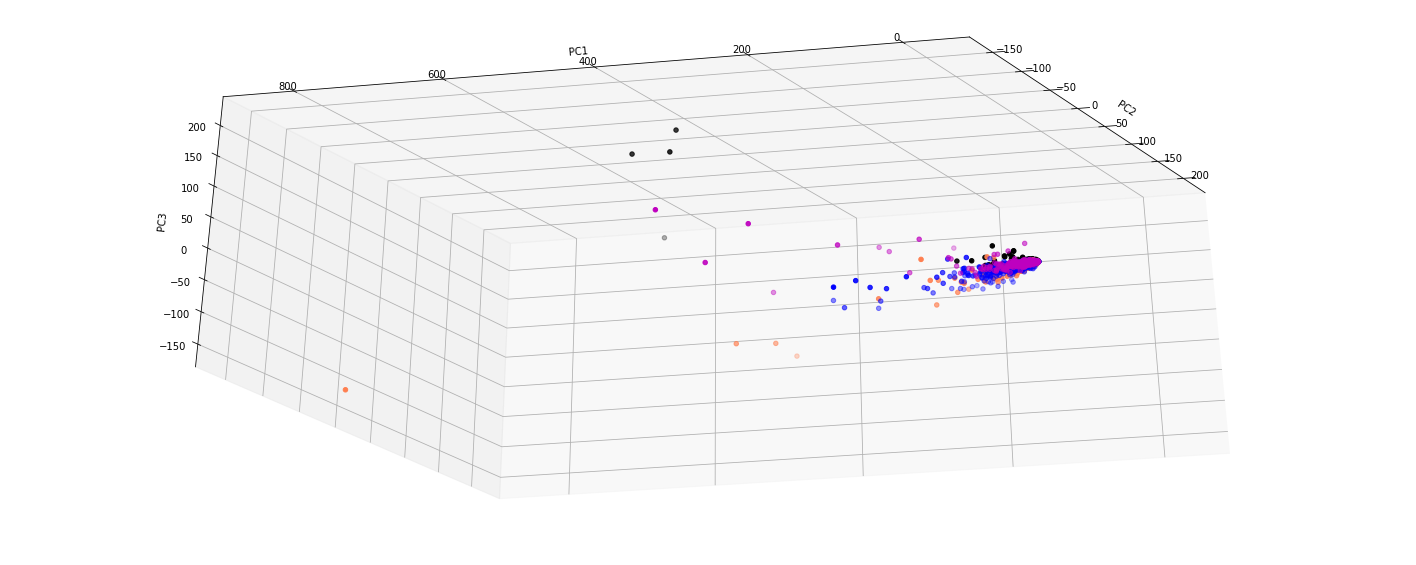

In [32]:
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[2]
    ys = X_reduced[X['category_name'] == category].T[0]
    zs = X_reduced[X['category_name'] == category].T[1]
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\n PC2')
ax.set_ylabel('\n PC1')
ax.set_zlabel('\n PC3')
ax.view_init(-30, 200)

#### Exercise 12 Answer
For 2D plot,we might be able to observe that most of the data stack together and hard to seperate. Yet, in 3D plot, things became better, that from different angle, we could visualize different color of data points. Also, outliers are shown in both 2d and 3d plot. If we remove them, the resolution of plot might be higher. 

### Exercise 13 (Take home )
Generate the interactive version of the plot 

In [33]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='Jessie_Cheng', api_key='gGkhp2vcw2AEq8PmeBiw')
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
data = [go.Bar(
            x=count_vect.get_feature_names(),
            y=term_frequencies
    )]

py.iplot(data, file_name = "Term Frequency Distribution")

The draw time for this plot will be slow for clients without much RAM.


C:\Anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow



### Exercise 14 (Take home)
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

In [34]:
index = np.argpartition(term_frequencies, -100)[-100:]
data = []
x = []
y= []
for i in index:
    x.append(count_vect.get_feature_names()[i])
    y.append(term_frequencies[i])
##print(x)


data = [go.Bar(
        x=x,
        y=y
    )]

py.iplot(data, file_name = "Term Frequency Distribution")

#### Exercise 14 Answer
Plot the bar chart of term frequecy only for the highest 100 terms. Use the `np.argpartition` to get the highest 100 term_frequencies index.

### Exercise 15 (Take home)
Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called long tail (get familiar with this term since it will appear a lot in data mining and other statistics courses)

In [35]:
top_100 = np.partition(term_frequencies,-100)[-100:]
top_100_index = np.argpartition(term_frequencies,-100)[-100:]

for i in range(100):
    index[i] = top_100_index[np.argsort(top_100)[99-i]]

data = []
x = []
y= []
for i in index:
    x.append(count_vect.get_feature_names()[i])
    y.append(term_frequencies[i])


data = [go.Bar(
        x=x,
        y=y
    )]

py.iplot(data, file_name = "Top 100 Term Frequency Distribution")


#### Exercise 15 Answer
As in exercise 14, but a sorted version. Use `np.argsort()` function, but for computation reduction, since sorting all of the term takes a long time. Preprocess with `np.partition()` and `np.argpartition()`, choose the top 100 terms first. Then sort only the top 100 terms instead for all terms. Finally we are able to observe the long tail.

### Exercise 16 (Take home )
Try to generate the binarization using the category_name column instead. Does it work?

In [36]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
mlb.classes_
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


#### Exercise 16 Answer
Yes, even for the string type of attribute, we can also binarize them to transfer into one-hot coding style.

---

# Part II Analyze and explore
> Dataset description and transform data into dataframe format and provide some techniques that we've practiced in lab1


#### Dataset description

    This is a dataset that contain senteces and labelled with positive and negative sentiment, show in 1 and 0.  
    The sentences comes from three source: _*imdb.com, amazon.com, yelp.com *_.  
    Each file has 1000 sentences(half positive and half negative) and its sentiment label alone in the format.  
    `Text   label`  
       
#### Load in the data
    Load data from __sentiment labelled sentences__ directory.  
    Use the `glob.iglob` function to read all the __.txt__ file as input.(Remove the readme file first)  
    Store the string into three lists: `text`, `label`, `file`.  
    * text : stores the sentences  
    * label : stores the label of each sentences
    * file : stores which file sentences comes from

In [40]:
### Begin Assignment Here!
import glob
import pandas as pd
import numpy as np
path = "./sentiment labelled sentences/"
##dir = glob.iglob('r'+"'"+path+"'")
dir = glob.iglob(r'./sentiment labelled sentences/*.txt')
text =[]
label = []
file = []
for filename in dir:
    filename = filename.split("\\")[-1]
    f = open(path+filename, encoding = 'utf8')
    for line in f:
        array = line.split("\t")
        text.append(array[0])
        label.append(array[1].split("\n")[0])
        file.append(filename.split(".")[0])
    print("Processing  ", filename)


Processing   amazon_cells_labelled.txt
Processing   imdb_labelled.txt
Processing   yelp_labelled.txt


#### Store the data into Dataframe structure  
Use two method to construct dataframe. First use the `DataFrame.from_items()` function creates form lists.  
>Lab 1 operation: Then, practice the add column method, add `File` attributes.

In [76]:
temp = [('Text', text),
        ('Label', label)]
DATA = pd.DataFrame.from_items(temp)
DATA['File'] = file
DATA[0:10]

,Text,Label,File
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled
1,"Good case, Excellent value.",1,amazon_cells_labelled
2,Great for the jawbone.,1,amazon_cells_labelled
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled
4,The mic is great.,1,amazon_cells_labelled
5,I have to jiggle the plug to get it to line up...,0,amazon_cells_labelled
6,If you have several dozen or several hundred c...,0,amazon_cells_labelled
7,If you are Razr owner...you must have this!,1,amazon_cells_labelled
8,"Needless to say, I wasted my money.",0,amazon_cells_labelled
9,What a waste of money and time!.,0,amazon_cells_labelled


#### Below shows some statics of this dataset 

In [47]:
print("Samples in dataset = ",len(DATA))
print("negative samples = ", len(DATA[DATA['Label']=='0']))
print("positive samples = ", len(DATA[DATA['Label']=='1']))

Samples in dataset =  3000
negative samples =  1500
positive samples =  1500


#### Add another attributes of how many words in the Text
>Lab1 operation

In [99]:
import nltk
from nltk.tokenize import word_tokenize

words = []
for i in range(len(DATA)):
    str = word_tokenize(DATA.Text[i])
    words.append(len(str))
DATA['Words'] = words


#### Shows the distribution of how many words is there in each text and plot in bar chart
As the figure shows, most of the text contains 3~20 words.

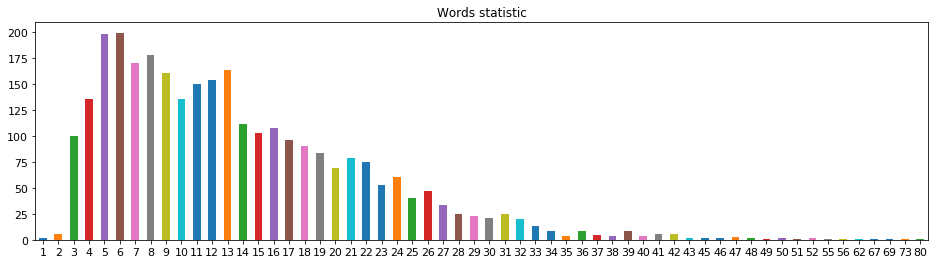

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline
temp = DATA.Words.value_counts()
temp.sort_index().plot(kind = 'bar',
                       title = 'Words statistic',
                       ylim = [0, temp.max()+10],        
                       rot = 0, fontsize = 11, figsize = (16,4))

#### Check if there is null or duplicate data in the dataset
>Lab1 operation

In [55]:
def check_missing_values(row):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in row:
        if element == True:
            counter+=1
    return ("The amount of missing records is: ", counter)
print(DATA.isnull().apply(lambda x: check_missing_values(x)))
sum(DATA.duplicated())

Text     (The amount of missing records is: , 0)
Label    (The amount of missing records is: , 0)
File     (The amount of missing records is: , 0)
dtype: object


0

#### The output shows that there exist 17 duplicates which we don't expect. So, use `drop_duplicates` to drop them.
>Lab 1 operation

In [253]:
## the inplace parameter indicates the dataframe is being replaced by new dataframe(after drop duplicates)
DATA.drop_duplicates(inplace=True)
print("The remain samples in DATA = ",len(DATA))

The remain samples in DATA =  2983


## Part III. Feature extraction
#### Following is the TFIDF(term frequency-inverse term frequency feature)
> Lab 1 operation  

Use the function in `Scikit-learn` to construct __TFIDF\_vec__ matrix.  
The output shows that there are 5155 different terms in this dataset and the matrix is a sparse matrix.

In [150]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
TFIDF_vec = vectorizer.fit_transform(DATA['Text'])
TFIDF_vec
##vectorizer.get_feature_names()

<2983x5155 sparse matrix of type '<class 'numpy.float64'>'
	with 31515 stored elements in Compressed Sparse Row format>

>Lab 1 operation

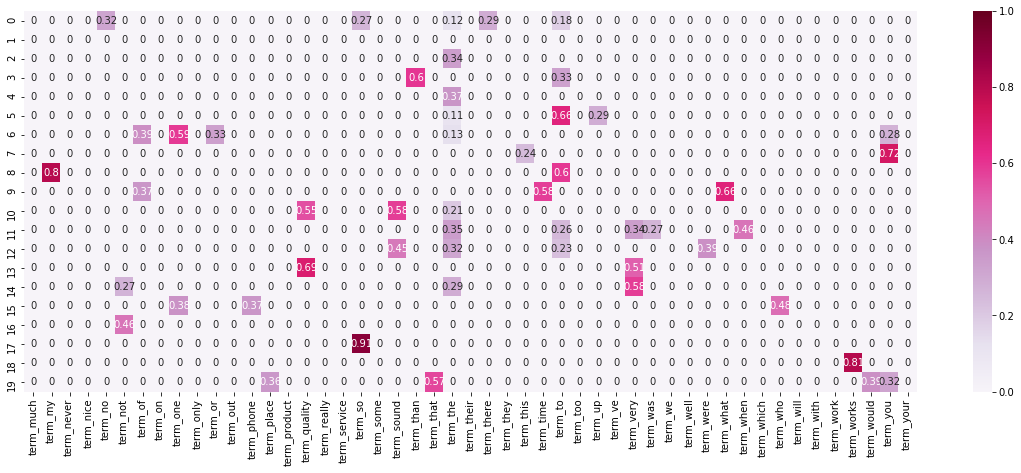

In [181]:
vectorizer_vis = TfidfVectorizer(max_features=100)
feature = vectorizer_vis.fit_transform(DATA.Text)
plot_x = []
plot_y = []
for i in range(100):
    plot_x.append("term_"+vectorizer_vis.get_feature_names()[i])
for i in range(20):
    plot_y.append(DATA.index[i])
plot_z = np.zeros([len(plot_y),100])
for i in range(len(plot_y)):
    for j in range(100):
        plot_z[i,j] = feature.toarray()[i, j]
import seaborn as sns

df_todraw = pd.DataFrame(plot_z[:,51::], columns = plot_x[51::], index = plot_y)
plt.subplots(figsize=(20, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

#### Also the word counts feature
> Lab 1 operation

In [109]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
word_count = count_vect.fit_transform(DATA.Text)
word_count

<2983x5155 sparse matrix of type '<class 'numpy.int64'>'
	with 31515 stored elements in Compressed Sparse Row format>

#### The long tail plot of HW1 dataset
> Lab 1 operation

In [252]:
term_frequencies = np.asarray(word_count.sum(axis=0))[0]
top_100 = np.partition(term_frequencies,-100)[-100:]
top_100_index = np.argpartition(term_frequencies,-100)[-100:]
index = np.zeros(100)
for i in range(100):
    index[i] = top_100_index[np.argsort(top_100)[99-i]]

data = []
x = []
y= []
for i in index.astype('int32'):
    x.append(count_vect.get_feature_names()[i])
    y.append(term_frequencies[i])
data = [go.Bar(
        x=x,
        y=y
    )]

py.iplot(data, file_name = "Top 100 Term Frequency Distribution")


#### After we have feature vectors we start to play with it by using different measure of similarity
###### Cosine similarity
Use the built in function of `scikit-learn` to calculate the cosine similarity of TFIDF and word counts respectively.  
The result would shows _how similar the two documents are_. Since it should be totally the same compare to itself, all of the `similarity[i][i]` should be 1(The maximum value of cosine).  
What we really interest in is the document that are similar to other documents.  
Some examples are shown below.

In [111]:
from sklearn.metrics.pairwise import cosine_similarity
TFIDF_similarity = cosine_similarity(TFIDF_vec,TFIDF_vec)
wordcount_similarity = cosine_similarity(word_count,word_count)
## first check the result between doucument_i itself is 1 as mentioned before
for i in range(len(TFIDF_similarity)):
    if (round(TFIDF_similarity[i,i],5) != 1):
        print("Something is wrong in TFIDF cosine similarity!!")
        break;
    if (round(wordcount_similarity[i,i],5) != 1):
        print(i)
        print("Something is wrong in wordcount cosine similarity!!")
        break;
print("Both cosine similarity is checked for diagonal entries.")

Both cosine similarity is checked for diagonal entries.


#### Example for sentence 0 and 10
For sentence 0, TFIDF_similarity and wordcount_similarity reports same sentences that are most similar.  
But for sentence 10, we found that two similarities results are different.  
Which implies that __*feature matters*__

In [137]:
## For sentence 0
print(DATA.Text[0], DATA.Label[0])
index = np.delete(TFIDF_similarity[0,:],0).argmax()
print(DATA.Text[index],DATA.Label[index])
index = np.delete(wordcount_similarity[0,:],0).argmax()
print(DATA.Text[index],DATA.Label[index])

So there is no way for me to plug it in here in the US unless I go by a converter. 0
Aside from it's terrible lead, this film has loads of other debits.   0
Aside from it's terrible lead, this film has loads of other debits.   0


In [136]:
## For sentence 10
print(DATA.Text[10], DATA.Label[10])
index = np.delete(TFIDF_similarity[10,:],10).argmax()
print(DATA.Text[index],DATA.Label[index])
index = np.delete(wordcount_similarity[10,:],10).argmax()
print(DATA.Text[index],DATA.Label[index])

And the sound quality is great. 1
It was an inexpensive piece, but I would still have expected better quality. 0
I've had this bluetoooth headset for some time now and still not comfortable with the way it fits on the ear. 0


#### Similarity measure- Euclidean distance
Since distance is a measure that how far two vector is, we can also apply it to a similarity measure.  
The smaller distance between two document, the more similar they are.

In [240]:
from sklearn.metrics.pairwise import euclidean_distances
Euc_distance_TFIDF = euclidean_distances(TFIDF_vec, TFIDF_vec)
Euc_distance_wordcount = euclidean_distances(word_count, word_count)

#### The Similarity by Euclidean distance examples
Sentence 1000, though both TFIDF feature and word count returns the same sentence as the most similar.  
The label are different from sentence 1000. Two sentence doesn't seems similar.

In [245]:
print(DATA.Text[150], DATA.Label[1000])
index = np.delete(Euc_distance_TFIDF[1000,:],1000).argmin()
print(DATA.Text[index],DATA.Label[index])
index = np.delete(Euc_distance_wordcount[1000,:],1000).argmin()
print(DATA.Text[index],DATA.Label[index])

I Was Hoping for More. 0
I don't each much pasta, but I love the homemade /hand made pastas and thin pizzas here. 1
I don't each much pasta, but I love the homemade /hand made pastas and thin pizzas here. 1


###### Sentence 10
TFIDF feature still returns the same sentence that are most similar, while word count returns another.

In [242]:
print(DATA.Text[10], DATA.Label[10])
index = np.delete(Euc_distance_TFIDF[10,:],10).argmin()
print(DATA.Text[index],DATA.Label[index])
index = np.delete(Euc_distance_wordcount[10,:],10).argmin()
print(DATA.Text[index],DATA.Label[index])

And the sound quality is great. 1
It was an inexpensive piece, but I would still have expected better quality. 0
The mic is great. 1


## Part IV. Build a naive Bayes Classifyer
Use scikit-learn to build a easy bayes classifier
I have test on Bernoulli classifier and multinomial classifier, surprisingly Bernoulli classifier performs slightly better than multinomial classifier. It might because of the binarization implies by Bernoulli classifier.  
The accuracy value is claculated by test set.
#### TFIDF Bernoulli clssifier
Performs the task 10 times repeatly and shuffle the training and test dataset each time, make sure the accuracy rate is not a coincidence.

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
classify_TFIDF = BernoulliNB(binarize=0.0)
accuracy_average = 0.0
for i in range(10):
    TFIDF_train, TFIDF_test, label_train, label_test = train_test_split(TFIDF_vec,DATA['Label'], test_size = 0.2)
    classify_TFIDF.fit(TFIDF_train, label_train)
    accuracy_average += classify_TFIDF.score(TFIDF_test, label_test)
    print(i+1,"th round of accuracy = ",classify_TFIDF.score(TFIDF_test, label_test))
print("Avg. Accuracy = ", accuracy_average/(i+1))

1 th round of accuracy =  0.8324958123953099
2 th round of accuracy =  0.8324958123953099
3 th round of accuracy =  0.8073701842546064
4 th round of accuracy =  0.8408710217755444
5 th round of accuracy =  0.8107202680067002
6 th round of accuracy =  0.8174204355108877
7 th round of accuracy =  0.8023450586264657
8 th round of accuracy =  0.8107202680067002
9 th round of accuracy =  0.8073701842546064
10 th round of accuracy =  0.8257956448911222
Avg. Accuracy =  0.8187604690117254


#### Test on the new sentences
Use `This is great.` or other sentence not in dataset and see if the classifier predict right.

In [208]:
classify_TFIDF.predict(vectorizer.transform(['This is great']).toarray())

array(['1'], dtype='<U1')

#### Wordcount Bernoulli clssifier
Performs the task 10 times repeatly and shuffle the training and test dataset each time, make sure the accuracy rate is not a coincidence.

In [205]:
classify_wordcount = BernoulliNB(binarize=0.0)
accuracy_average = 0.0
for i in range(10):
    wordcount_train,wordcount_test, label_train, label_test = train_test_split(word_count,DATA['Label'],test_size = 0.2)
    classify_wordcount.fit(wordcount_train,label_train)
    accuracy_average += classify_wordcount.score(wordcount_test,label_test)
    print(i+1," th round of accuracy = ", classify_wordcount.score(wordcount_test, label_test))
print("Avg. Accuracy = ", accuracy_average/(i+1))

1  th round of accuracy =  0.8174204355108877
2  th round of accuracy =  0.8341708542713567
3  th round of accuracy =  0.8123953098827471
4  th round of accuracy =  0.8107202680067002
5  th round of accuracy =  0.8207705192629816
6  th round of accuracy =  0.8174204355108877
7  th round of accuracy =  0.847571189279732
8  th round of accuracy =  0.8241206030150754
9  th round of accuracy =  0.8224455611390284
10  th round of accuracy =  0.8375209380234506
Avg. Accuracy =  0.8244556113902848


#### Test on the new sentences
Use `Everyday is new.` or other sentence not in dataset and see if the classifier predict right.

In [207]:
classify_wordcount.predict(count_vect.transform(['Everyday is new.']).toarray())

array(['1'], dtype='<U1')

#### TFIDF Multimodal Bayes classifier

In [210]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
classify_TFIDF = MultinomialNB()
accuracy_average = 0.0
for i in range(10):
    TFIDF_train, TFIDF_test, label_train, label_test = train_test_split(TFIDF_vec,DATA['Label'], test_size = 0.2)
    classify_TFIDF.fit(TFIDF_train, label_train)
    accuracy_average += classify_TFIDF.score(TFIDF_test, label_test)
    print(i+1,"th round of accuracy = ",classify_TFIDF.score(TFIDF_test, label_test))
print("Avg. Accuracy = ", accuracy_average/(i+1))

1 th round of accuracy =  0.8224455611390284
2 th round of accuracy =  0.8073701842546064
3 th round of accuracy =  0.8324958123953099
4 th round of accuracy =  0.8123953098827471
5 th round of accuracy =  0.8123953098827471
6 th round of accuracy =  0.8157453936348409
7 th round of accuracy =  0.8425460636515912
8 th round of accuracy =  0.7839195979899497
9 th round of accuracy =  0.830820770519263
10 th round of accuracy =  0.8157453936348409
Avg. Accuracy =  0.8175879396984925


#### Test on the new sentences
Use `Close to finished.` or other sentence not in dataset and see if the classifier predict right.

In [212]:
classify_TFIDF.predict(vectorizer.transform(['Close to finished']).toarray())

array(['1'], dtype='<U1')

#### Wordcount Multimodal Bayes Classifier

In [215]:
classify_wordcount = MultinomialNB()
wordcount_train,wordcount_test, label_train, label_test = train_test_split(word_count,DATA['Label'],test_size = 0.2)
accuracy_average = 0.0
for i in range(10):
    wordcount_train,wordcount_test, label_train, label_test = train_test_split(word_count,DATA['Label'],test_size = 0.2)
    classify_wordcount.fit(wordcount_train,label_train)
    accuracy_average += classify_wordcount.score(wordcount_test,label_test)
    print(i+1," th round of accuracy = ", classify_wordcount.score(wordcount_test, label_test))
print("Avg. Accuracy = ", accuracy_average/(i+1))

1  th round of accuracy =  0.8442211055276382
2  th round of accuracy =  0.8207705192629816
3  th round of accuracy =  0.8190954773869347
4  th round of accuracy =  0.8090452261306532
5  th round of accuracy =  0.8190954773869347
6  th round of accuracy =  0.8107202680067002
7  th round of accuracy =  0.8358458961474037
8  th round of accuracy =  0.8157453936348409
9  th round of accuracy =  0.8458961474036851
10  th round of accuracy =  0.8140703517587939
Avg. Accuracy =  0.8234505862646566


#### Test on the new sentences
Use `Homework 1 is finally done.` or other sentence not in dataset and see if the classifier predict right.

In [217]:
classify_wordcount.predict(count_vect.transform(['Homework 1 is finally done!']).toarray())

array(['1'], dtype='<U1')

#### Try to figure out better ratio between train and test set
It seems like somewhere between 0.7~0.8 is a better range.  
The accuracy might drops for training set lower than 0.6 of the whole dataset.  
For higher than 0.8, the model seems to be unstable.

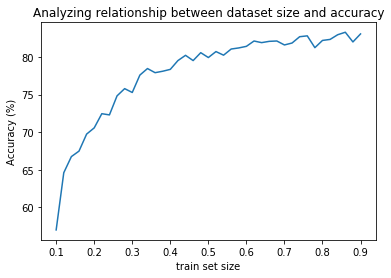

In [237]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
%matplotlib inline
classify_TFIDF = BernoulliNB(binarize=0.0)
accuracy = []
for i in range(41):
    accuracy_average = 0.0
    for j in range(5):
        TFIDF_train, TFIDF_test, label_train, label_test = train_test_split(TFIDF_vec,DATA['Label'], test_size = 0.1+0.02*i)
        classify_TFIDF.fit(TFIDF_train, label_train)
        accuracy_average += classify_TFIDF.score(TFIDF_test, label_test)
    accuracy.append(accuracy_average/5)

t = 1 - np.arange(0.1, 0.92, 0.02)
s = np.array(accuracy)*100

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='train set size/ whole dataset', ylabel='Accuracy (%)',
       title='Analyzing relationship between dataset size and accuracy')

plt.show()


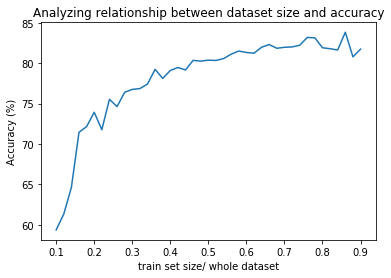

In [248]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
%matplotlib inline
classify_wordcount = BernoulliNB(binarize=0.0)
accuracy = []
for i in range(41):
    accuracy_average = 0.0
    for j in range(5):
        wordcount_train, wordcount_test, label_train, label_test = train_test_split(word_count,DATA['Label'], test_size = 0.1+0.02*i)
        classify_wordcount.fit(wordcount_train, label_train)
        accuracy_average += classify_wordcount.score(wordcount_test, label_test)
    accuracy.append(accuracy_average/5)

t = 1 - np.arange(0.1, 0.92, 0.02)
s = np.array(accuracy)*100

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='train set size/ whole dataset', ylabel='Accuracy (%)',
       title='Analyzing relationship between dataset size and accuracy')

plt.show()


# The end of the HW1